In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


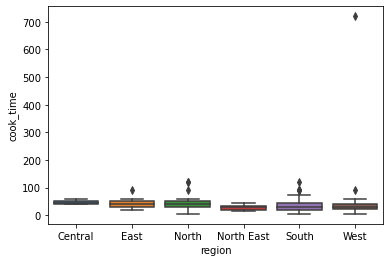

In [8]:
# Using pandas methods and slicing to determine the order by decreasing median
new_order = indian_food.groupby(by=['region'])['cook_time'].median().iloc[::1].index
sns.boxplot(x='region', y='cook_time', data=indian_food, order=new_order)
plt.show()

In [10]:
no_720 = (indian_food['cook_time'] == 720)
cook_time = indian_food.loc[~no_720]

In [16]:
def boxp2(var1, var2, title, ylabel):
    # Using cook_time without outlier
    # Using pandas methods and slicing to determine the order by decreasing median
    new_order = cook_time.groupby(by=[var1])[var2].median().iloc[::1].index
    sns.boxplot(x=var1, y=var2, data=cook_time, order=new_order, color='#2b8cbe')

    plt.title(title, y=1.07, fontsize=15)
    plt.ylabel(ylabel)
    plt.show()

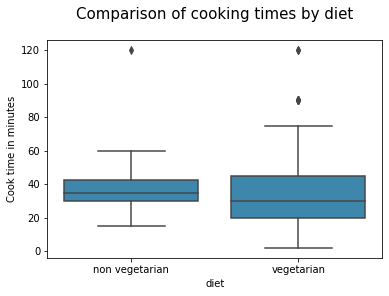

In [18]:
boxp2('diet', 'cook_time', "Comparison of cooking times by diet", "Cook time in minutes")

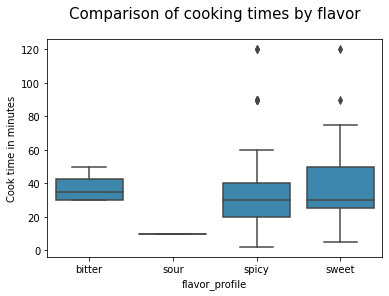

In [20]:
boxp2('flavor_profile', 'cook_time', "Comparison of cooking times by flavor", "Cook time in minutes")

In [22]:
cook_time[cook_time['flavor_profile']=='sour']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
190,Keri no ras,"mango, sugar",vegetarian,10.0,10.0,sour,main course,Gujarat,West,2


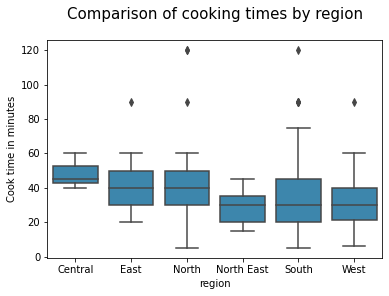

In [24]:
boxp2('region', 'cook_time', "Comparison of cooking times by region", "Cook time in minutes")

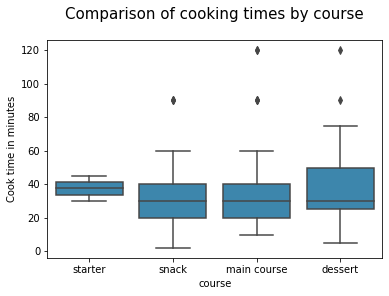

In [35]:
# Using cook_time without outlier
# Using pandas methods and slicing to determine the order by decreasing median
new_order = cook_time.groupby(by=['course'])['cook_time'].median().iloc[::-1].index
sns.boxplot(x='course', y='cook_time', data=cook_time, order=new_order, color='#2b8cbe')

plt.title("Comparison of cooking times by course", y=1.07, fontsize=15)
plt.ylabel("Cook time in minutes")
plt.show()

In [32]:
cook_time.groupby(by=['course'])['cook_time'].median().iloc[::-1]

course
starter        37.5
snack          30.0
main course    30.0
dessert        30.0
Name: cook_time, dtype: float64

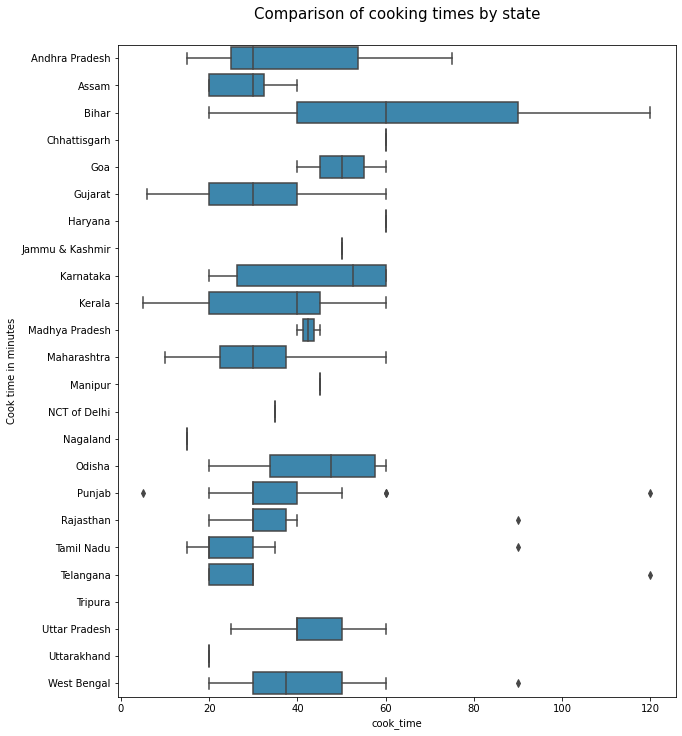

In [43]:
# Using cook_time without outlier
# Using pandas methods and slicing to determine the order by decreasing median
plt.figure(figsize=(10,12))
new_order = cook_time.groupby(by=['state'])['cook_time'].median().iloc[::1].index
sns.boxplot(y='state', x='cook_time', data=cook_time, order=new_order, color='#2b8cbe')

plt.title("Comparison of cooking times by state", y=1.03, fontsize=15)
plt.ylabel("Cook time in minutes")
plt.show()

In [45]:
cook_time.groupby(by=['state'])['cook_time'].median().iloc[::1]

state
Andhra Pradesh     30.0
Assam              30.0
Bihar              60.0
Chhattisgarh       60.0
Goa                50.0
Gujarat            30.0
Haryana            60.0
Jammu & Kashmir    50.0
Karnataka          52.5
Kerala             40.0
Madhya Pradesh     42.5
Maharashtra        30.0
Manipur            45.0
NCT of Delhi       35.0
Nagaland           15.0
Odisha             47.5
Punjab             30.0
Rajasthan          30.0
Tamil Nadu         20.0
Telangana          30.0
Tripura             NaN
Uttar Pradesh      40.0
Uttarakhand        20.0
West Bengal        37.5
Name: cook_time, dtype: float64

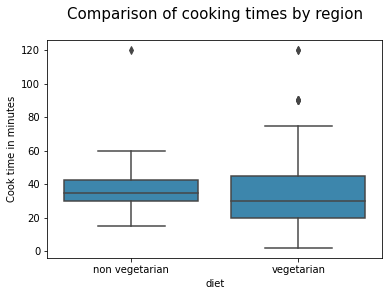

In [26]:
# Using cook_time without outlier
# Using pandas methods and slicing to determine the order by decreasing median
new_order = cook_time.groupby(by=['diet'])['cook_time'].median().iloc[::1].index
sns.boxplot(x='diet', y='cook_time', data=cook_time, order=new_order, color='#2b8cbe')

plt.title("Comparison of cooking times by region", y=1.07, fontsize=15)
plt.ylabel("Cook time in minutes")
plt.show()

In [34]:
cook_time.groupby(by=['diet'])['cook_time'].median().iloc[::1]

diet
non vegetarian    35.0
vegetarian        30.0
Name: cook_time, dtype: float64

In [27]:
new_order

Index(['non vegetarian', 'vegetarian'], dtype='object', name='diet')